## Capstone I:  NHANES 2015-2016 Data Wrangling

Our objective is to identify ways to reduce hospital readmission rates related to cardiovascular disease for our client. 

The first step in completing this project is data collection and cleaning. The following are the steps that were taken.

1. Downloaded the datasets of interest from the Centers for Disease Control and Prevention website: https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015.


2. Imported pandas and numpy into the Python notebook, read the SAS files into pandas dataframes, and merged the datasets of interest.


3. Examined the data
    - Noted shape and size of dataset.
    - Made the dataset smaller by creating a new dataset only containing columns of main interest.
    - Noted column names and edited to make more user-friendly.
    - Noted data types within the different columns, and edited when needed.
    - Examined null values and outliers by observing data summaries and creating boxplots and histograms.
        - Null values: Many of the columns contained null values ('NaN'). We kept these values in the dataset, because not all questions in the questionnaires and all laboratory values were taken from all participants. Numerical values that were similar to null (i.e., where response was 'refused' or 'don't know', were replaced with 'NaN'. Categorical variables (represented in the dataset by numbers) with the responses 'refused' and 'don't know' were left alone for now.
        - Outliers:  Since the dataset is relatively small in regard to participants who have had >1 overnight hospital stay in the last year, and also in regard to participants with cardiovascular disease, we left all other outliers in the dataset.


### Importing pandas library (for data manipulation and analysis), as well as numpy and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We imported the SAS data files into pandas dataframes, then merged the dataframes together.


In [2]:

acq = pd.read_sas('NHANES/ACQ_I_acculturation.XPT')
bmx = pd.read_sas('NHANES/BMX_I_body_measures.xpt')
demo = pd.read_sas('NHANES/DEMO_I_demographics.XPT')
diq = pd.read_sas('NHANES/DIQ_I_diabetes.xpt')
dpq = pd.read_sas('NHANES/DPQ_I_depression.xpt')
dxx = pd.read_sas('NHANES/DXX_I_dexa.xpt')
fsq = pd.read_sas('NHANES/FSQ_I_food_security.xpt')
huq = pd.read_sas('NHANES/HUQ_I_hospitalization.XPT')
hiq = pd.read_sas('NHANES/HIQ_I_health_insurance.xpt')
mcq = pd.read_sas('NHANES/MCQ_I_medical_conditions.XPT')
glu = pd.read_sas('NHANES/GLU_I_glucose.XPT')
hdl = pd.read_sas('NHANES/HDL_I_hdl.XPT')
ldltg = pd.read_sas('NHANES/TRIGLY_I_ldl_tg.XPT')
tc = pd.read_sas('NHANES/TCHOL_I_tc.XPT')
hgba1c = pd.read_sas('NHANES/GHB_I_hgba1c.XPT')


#Merging the 15 dataframes together into one large dataframe
nhanes = acq.merge(bmx, on='SEQN', how='outer') \
.merge(demo, on='SEQN', how='outer') \
.merge(diq, on='SEQN', how='outer').merge(dpq, on='SEQN', how ='outer') \
.merge(dxx, on='SEQN', how='outer').merge(fsq, on='SEQN', how='outer') \
.merge(huq, on='SEQN', how='outer').merge(hiq, on='SEQN', how='outer') \
.merge(mcq, on='SEQN', how='outer').merge(glu, on='SEQN', how='outer')\
.merge(hdl, on='SEQN', how='outer').merge(ldltg, on='SEQN', how='outer')\
.merge(tc, on='SEQN', how='outer').merge(hgba1c, on='SEQN', how='outer')


#### After careful examination of the data and based on our knowledge/experience in public health, social sciences, and patient care,  we decided that we will explore the following features in the dataframe:

SEQN = study participant ID

RIAGENDR = participant's gender: 1=Male, 2=Female, NaN = Missing

RIDAGEYR = Current age of participant: Range of values = 0-79 years, 80=80 years and older, NaN = Missing

RIDRETH3 = Race/Ethnicity:
    1=Mexican American, 2=Other Hispanic, 3=Non-Hispanic White, 4=Non-Hispanic Black, 6=Non-Hispanic Asian,
    7=Other race, including multi-racial, NaN = Missing

ACD040 = Language(s) spoken at home Hispanics:
    1= Spanish only, 2=More spanish than English, 3= Both equally, 4=More English than Spanish
    5= Only English, 7= Refused, 9=Don't know, NaN = Missing
         
ACD011A = Language(s) spoken at home (Non-Hispanic white, Non-Hispanic black, or other race including multi-racial):
    1 = English, 77 = Refused, 99 = Don't know, NaN = Missing

ACD110 = Language(s) spoken at home - Asians: 
   1= Only non-English language, 2=More non-English than English, 3= Both equally, 4=More English than non-English,
   5= Only English, 7= Refused, 9=Don't know, NaN = Missing
        
BMXBMI = Body Mass Index: Range of values = 11.5-67.3, NaN = Missing

DIQ010 = Have you ever been told by a doctor or health professional that you have diabetes: 
    1=Yes,2=No, 3=Borderline, 7=Refused, 9= Don't know, NaN = Missing

DID040 = At what age were you told you have diabetes? 
    Range of values =  1-79 years, 80 = 80 years and older, 666 = less than 1 year of age, 777 = refused, 999=don't know, 
    NaN = Missing

DIQ160 = Ever told you have prediabetes? 1=yes, 2=no, 7=refused, 9=don't know, NaN = Missing

DPQ010 - DPQ100 - Depression screening questions from 9-item depression screening instrument, 
    'The Patient Health Questionnaire'. A total score is based on the sum all responses, and Ranges from 0 to 27. 
    Major depression and depression severity can be assessed using pre-defined cut-point references)
    Possible choices for each question: 
    0 = Not at all, 1= several days, 2=more than half the days,3=Nearly every day, 7=Refused, 9=Don't know, NaN = Missing, 
    Sum of DPQ questionnaire >9 indicates lowest levels of depression.

DXDTOPF = Percent Body Fat: Range of values: 11.7 to 54.7, NaN = Missing

FSD032B = The food that {I/we} bought just didn't last, and {I/we} didn't have enough money to get more food:
    1= Often True, 2= Sometimes true, 3=Never True, 7=Refused, 9=Don't know, NaN = Missing

MCQ160b = 'Have you ever been told you have congestive heart failure: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

MCQ180b = Age when told you had heart failure: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 

MCQ160c = Have you ever been told you had coronary heart disease: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

MCQ180c = Age of onset of coronary heart disease: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 

MCQ160d = Have you ever been told you have angina/angina pectoris: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing 

MCQ180d = Age of onset of angina/angina pectoris: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


MCQ160e = Ever told you had a heart attack: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

MCQ180e = Age when told you had a heart attack: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


MCQ160f = Ever told you had a stroke: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

MCQ180f = Age when told you had a stroke: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


HUD080 = Number of hospital stays (1 or more nights/stay)in the last year: 
    1=1, 2=2, 3=3, 4=4, 5=5, 6= 6 or greater, 77777=Refused, 99999=Don't know, NaN = Missing

LBXGLU = Fasting plasma glucose(mg/dl): Range of values = 21-479, NaN = Missing

LBDHDD = Fasting Direct HDL cholesterol(mg/dl): Range of values = 6-226, NaN = Missing

LBXTR = Fasting triglycerides(mg/dl): Range of values = 14-2141, NaN = Missing

LBDLDL = Fasting LDL cholesterol(mg/dl): Range of values = 23-277, NaN = Missing

LBXTC = Fasting Total Cholesterol(mg/dl): Range of values = 77-545, NaN = Missing

LBXGH = Glycated hemoglobin (Hemoglobin A1c) (%): Range of values = 3.8-17, NaN = Missing

#### Next, we select the columns of interest and create an updated (abridged) dataframe.

In [3]:

nhanes = nhanes[['SEQN','RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'ACD040', 'ACD011A', 'ACD110', 'BMXBMI', \
                  'DIQ010', 'DID040', 'DIQ160', 'DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060',\
                  'DPQ070','DPQ080','DPQ090','DPQ100', 'DXDTOPF', 'FSD032B', 'MCQ160B', 'MCQ180B',\
                  'MCQ160C', 'MCQ180C','MCQ160D', 'MCQ180D', 'MCQ160E', 'MCQ180E', 'MCQ160F', 'MCQ180F', 'HUD080',\
                'LBXGLU','LBDHDD','LBXTR', 'LBDLDL','LBXTC', 'LBXGH' ]]

#Confirming pandas dataframe has been created
print(type(nhanes))


<class 'pandas.core.frame.DataFrame'>


In [4]:
nhanes.shape

(9971, 40)

### The dataset has more than 9900 records with 40 features.

In [5]:
# Quick exploration of the dataframe.
print(nhanes.head())
print(nhanes.tail())

      SEQN  RIDAGEYR  RIAGENDR  RIDRETH3  ACD040  ACD011A  ACD110  BMXBMI  \
0  83732.0      62.0       1.0       3.0     NaN      1.0     NaN    27.8   
1  83733.0      53.0       1.0       3.0     NaN      NaN     NaN    30.8   
2  83734.0      78.0       1.0       3.0     NaN      1.0     NaN    28.8   
3  83735.0      56.0       2.0       3.0     NaN      1.0     NaN    42.4   
4  83736.0      42.0       2.0       4.0     NaN      1.0     NaN    20.3   

   DIQ010  DID040  ...  MCQ180E  MCQ160F  MCQ180F  HUD080  LBXGLU  LBDHDD  \
0     1.0    46.0  ...      NaN      2.0      NaN     NaN     NaN    46.0   
1     2.0     NaN  ...      NaN      2.0      NaN     NaN   101.0    63.0   
2     1.0    52.0  ...     58.0      2.0      NaN     NaN    84.0    30.0   
3     2.0     NaN  ...      NaN      2.0      NaN     NaN     NaN    61.0   
4     2.0     NaN  ...      NaN      2.0      NaN     NaN    84.0    53.0   

   LBXTR  LBDLDL  LBXTC  LBXGH  
0    NaN     NaN  173.0    7.0  
1  147.0

In [6]:
#Examining datatypes, column types, non-null values, and memory usage.

nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 40 columns):
SEQN        9971 non-null float64
RIDAGEYR    9971 non-null float64
RIAGENDR    9971 non-null float64
RIDRETH3    9971 non-null float64
ACD040      2882 non-null float64
ACD011A     4964 non-null float64
ACD110      984 non-null float64
BMXBMI      8756 non-null float64
DIQ010      9575 non-null float64
DID040      853 non-null float64
DIQ160      6045 non-null float64
DPQ010      5164 non-null float64
DPQ020      5164 non-null float64
DPQ030      5164 non-null float64
DPQ040      5162 non-null float64
DPQ050      5162 non-null float64
DPQ060      5162 non-null float64
DPQ070      5161 non-null float64
DPQ080      5161 non-null float64
DPQ090      5161 non-null float64
DPQ100      3579 non-null float64
DXDTOPF     4598 non-null float64
FSD032B     9649 non-null float64
MCQ160B     5719 non-null float64
MCQ180B     214 non-null float64
MCQ160C     5719 non-null float64
MCQ180C     

In [7]:
#Renaming the columns of the dataframe, so that it is easier to understand the variables of interest.

nhanes.columns = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetes', 'diabetes_age', 'prediabetes', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']


In [8]:
# Confirming column names have changed.
print(nhanes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 40 columns):
seqn               9971 non-null float64
age                9971 non-null float64
gender             9971 non-null float64
ethnicity          9971 non-null float64
lang_hisp          2882 non-null float64
lang_nhb_nhw       4964 non-null float64
lang_asian         984 non-null float64
bmi                8756 non-null float64
diabetes           9575 non-null float64
diabetes_age       853 non-null float64
prediabetes        6045 non-null float64
depr1              5164 non-null float64
depr2              5164 non-null float64
depr3              5164 non-null float64
depr4              5162 non-null float64
depr5              5162 non-null float64
depr6              5162 non-null float64
depr7              5161 non-null float64
depr8              5161 non-null float64
depr9              5161 non-null float64
depr10             3579 non-null float64
bodyfatpct         4598 non-null f

#### Decided to not remove null values, since all features do not apply to all participants of interest.

#### Next, we begin to address data elements that are null but are coded differently.

Here, we also make adjustments to age columns and depression scores, and typecast categorical variables.

In [9]:
# Replacing values in the questionnaires that had responses of either 'refused'(77777 and 777), or 
#'Don't Know' (99999 and 999) with 'NaN' 
cols = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetes', 'diabetes_age', 'prediabetes', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']

depr = ['depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6', 'depr7', 'depr8', 'depr9', 'depr10']
agecols=['age','diabetes_age','chf_age', 'chd_age','angina_age', 'heartattack_age', 'stroke_age', 'numhosp']
othercols=['lang_hisp','lang_nhb_nhw','lang_asian','diabetes','prediabetes','depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10','foodsec','chf','chd','angina','heartattack','stroke']

# Since some of the participants were infants under 12 months, their ages were calculated as less than 1 year, 
# resulting in exponential values. To fix this, we will round the ages:
nhanes[agecols] = nhanes[agecols].round(decimals=0)

# Rounding up the depression scores for better display
nhanes[depr] = nhanes[depr].round(decimals=0)


#changing 'refused' and 'don't know' responses with NaN
nhanes[agecols]= nhanes[agecols].replace({666:0, 777:np.nan, 999:np.nan, 99999:np.nan, 77777:np.nan})
nhanes[othercols]=nhanes[othercols].replace({7:np.nan, 9:np.nan})
nhanes.numhosp=nhanes.numhosp.replace({99999:np.nan, 77777:np.nan})

#replacing borderline diabetes=yes to diabetes = no
nhanes['diabetes']=nhanes['diabetes'].replace(3,0)

# Typecasting boolean variables (0=male, 1=female; 0=No, 1=Yes)
nhanes.gender = nhanes.gender.replace([1], 0)
nhanes.gender = nhanes.gender.replace([2], 1)
nhanes.diabetes = nhanes.diabetes.replace([2],0)
nhanes.prediabetes = nhanes.prediabetes.replace([2],0)
nhanes.chf = nhanes.chf.replace([2],0)
nhanes.chd = nhanes.chd.replace([2],0)
nhanes.angina = nhanes.angina.replace([2],0)
nhanes.heartattack = nhanes.heartattack.replace([2],0)
nhanes.stroke = nhanes.stroke.replace([2],0)

# Typecasting categorical variables.
nhanes.ethnicity = nhanes.ethnicity.astype('category')
nhanes.lang_hisp = nhanes.lang_hisp.astype('category')
nhanes.lang_nhb_nhw = nhanes.lang_nhb_nhw.astype('category')
nhanes.lang_asian = nhanes.lang_asian.astype('category')
nhanes.foodsec = nhanes.foodsec.astype('category')


'''nhanes.diabetes = nhanes.diabetes.astype('int')
nhanes.prediabetes = nhanes.prediabetes.astype('int')
nhanes.chf = nhanes.chf.astype('int')
nhanes.chd = nhanes.chd.astype('int')
nhanes.angina = nhanes.angina.astype('int')
nhanes.heartattack = nhanes.heartattack.astype('int')
nhanes.stroke = nhanes.stroke.astype('int')'''




# Considered converting  the remainin categorical variables (which are ordinal) into dtype 'int'. However, since there are many
# NaN datapoints that we would like keep in the dataset, decided to leave those categorical variables as floats ( 
# 'gender', 'diabetes', 'prediabetes','chf', 'chd', 'angina', 'heartattack', and 'stroke' ).

"nhanes.diabetes = nhanes.diabetes.astype('int')\nnhanes.prediabetes = nhanes.prediabetes.astype('int')\nnhanes.chf = nhanes.chf.astype('int')\nnhanes.chd = nhanes.chd.astype('int')\nnhanes.angina = nhanes.angina.astype('int')\nnhanes.heartattack = nhanes.heartattack.astype('int')\nnhanes.stroke = nhanes.stroke.astype('int')"

In [10]:
#Viewing category codes for 'ethnicity' variable. Note that the category numbers have decreased by 1, as expected.
nhanes.ethnicity.cat.codes.head(5)

0    2
1    2
2    2
3    2
4    3
dtype: int8

In [11]:
'''#Changing ordinal categorical variables to from float to integer

nhanes[~nhanes[['gender', 'diabetes', 'prediabetes', 'chf', 'chd', 'angina', 'heartattack', 'stroke']].isnull()]
nhanes['gender']=pd.to_numeric(nhanes['gender'], errors='coerce')
nhanes['diabetes'] = pd.to_numeric(nhanes['diabetes'], errors='coerce')
nhanes['prediabetes'] = pd.to_numeric(nhanes['prediabetes'], errors='coerce')
nhanes['chf'] = pd.to_numeric(nhanes['chf'], errors='coerce')
nhanes['chd'] = pd.to_numeric(nhanes['chd'], errors='coerce')
nhanes['angina'] = pd.to_numeric(nhanes['angina'], errors='coerce')
nhanes['heartattack'] = pd.to_numeric(nhanes['heartattack'], errors='coerce')
nhanes['stroke'] = pd.to_numeric(nhanes['stroke'], errors='coerce')

nhanes = nhanes.dropna(subset=['gender'])
nhanes = nhanes.dropna(subset=['diabetes'])
nhanes = nhanes.dropna(subset=['prediabetes'])
nhanes = nhanes.dropna(subset=['chf'])
nhanes = nhanes.dropna(subset=['chd'])
nhanes = nhanes.dropna(subset=['angina'])
nhanes = nhanes.dropna(subset=['heartattack'])
nhanes = nhanes.dropna(subset=['stroke'])

nhanes[['gender', 'diabetes', 'prediabetes', 'chf', 'chd', 'angina', 'heartattack', 'stroke']] \
= nhanes[['gender', 'diabetes', 'prediabetes', 'chf', 'chd', 'angina', 'heartattack', 'stroke']].astype(int)'''

"#Changing ordinal categorical variables to from float to integer\n\nnhanes[~nhanes[['gender', 'diabetes', 'prediabetes', 'chf', 'chd', 'angina', 'heartattack', 'stroke']].isnull()]\nnhanes['gender']=pd.to_numeric(nhanes['gender'], errors='coerce')\nnhanes['diabetes'] = pd.to_numeric(nhanes['diabetes'], errors='coerce')\nnhanes['prediabetes'] = pd.to_numeric(nhanes['prediabetes'], errors='coerce')\nnhanes['chf'] = pd.to_numeric(nhanes['chf'], errors='coerce')\nnhanes['chd'] = pd.to_numeric(nhanes['chd'], errors='coerce')\nnhanes['angina'] = pd.to_numeric(nhanes['angina'], errors='coerce')\nnhanes['heartattack'] = pd.to_numeric(nhanes['heartattack'], errors='coerce')\nnhanes['stroke'] = pd.to_numeric(nhanes['stroke'], errors='coerce')\n\nnhanes = nhanes.dropna(subset=['gender'])\nnhanes = nhanes.dropna(subset=['diabetes'])\nnhanes = nhanes.dropna(subset=['prediabetes'])\nnhanes = nhanes.dropna(subset=['chf'])\nnhanes = nhanes.dropna(subset=['chd'])\nnhanes = nhanes.dropna(subset=['angin

In [12]:
#Viewing data types and count of non-null elements for selected columns.
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 40 columns):
seqn               9971 non-null float64
age                9971 non-null float64
gender             9971 non-null float64
ethnicity          9971 non-null category
lang_hisp          2880 non-null category
lang_nhb_nhw       4964 non-null category
lang_asian         981 non-null category
bmi                8756 non-null float64
diabetes           9571 non-null float64
diabetes_age       841 non-null float64
prediabetes        6034 non-null float64
depr1              5151 non-null float64
depr2              5161 non-null float64
depr3              5161 non-null float64
depr4              5161 non-null float64
depr5              5158 non-null float64
depr6              5159 non-null float64
depr7              5159 non-null float64
depr8              5158 non-null float64
depr9              5157 non-null float64
depr10             3577 non-null float64
bodyfatpct         4598 non-nu

In [13]:
#Viewing summary of data for each series that is numeric
nhanes.describe()

,seqn,age,gender,bmi,diabetes,diabetes_age,prediabetes,depr1,depr2,depr3,...,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
count,9971.000000,9971.000000,9971.000000,8756.000000,9571.000000,841.000000,6034.000000,5151.000000,5161.000000,5161.000000,...,246.000000,5714.000000,205.000000,868.000000,2972.000000,7256.000000,2723.000000,2699.000000,7256.000000,6326.000000
mean,88717.000000,31.899408,0.509377,26.016697,0.089437,48.403092,0.085018,0.403611,0.342763,0.612672,...,56.662602,0.036577,55.751220,1.473502,110.609017,54.400910,106.603746,107.715080,180.256615,5.746364
std,2878.524101,24.768829,0.499937,7.963873,0.285388,15.139052,0.278932,0.786277,0.701141,0.928524,...,12.620197,0.187737,17.013304,0.962018,38.605914,16.618883,91.369146,35.887167,41.337081,1.104387
min,83732.000000,0.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.000000,2.000000,1.000000,21.000000,6.000000,14.000000,23.000000,77.000000,3.800000
25%,86224.500000,9.000000,0.000000,19.900000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,47.000000,1.000000,94.000000,43.000000,57.000000,81.000000,150.000000,5.200000
50%,88717.000000,27.000000,1.000000,25.200000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,0.000000,58.000000,1.000000,101.000000,52.000000,85.000000,104.000000,176.000000,5.500000
75%,91209.500000,53.000000,1.000000,30.600000,0.000000,60.000000,0.000000,1.000000,0.000000,1.000000,...,66.000000,0.000000,68.000000,2.000000,111.000000,64.000000,130.000000,129.000000,204.000000,5.800000
max,93702.000000,80.000000,1.000000,67.300000,1.000000,80.000000,1.000000,3.000000,3.000000,3.000000,...,80.000000,1.000000,80.000000,6.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000


In [14]:
#was unable to view all columns. To fix this:
pd.set_option('display.max_columns', 50)
nhanes.describe()
nhanes.head(20)

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetes,diabetes_age,prediabetes,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
0,83732.0,62.0,0.0,3.0,NaN,1.0,NaN,27.8,1.0,46.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0
1,83733.0,53.0,0.0,3.0,NaN,NaN,NaN,30.8,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5
2,83734.0,78.0,0.0,3.0,NaN,1.0,NaN,28.8,1.0,52.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,58.0,0.0,NaN,NaN,84.0,30.0,269.0,145.0,229.0,5.8
3,83735.0,56.0,1.0,3.0,NaN,1.0,NaN,42.4,0.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6
4,83736.0,42.0,1.0,4.0,NaN,1.0,NaN,20.3,0.0,NaN,0.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6
5,83737.0,72.0,1.0,1.0,1.0,NaN,NaN,28.6,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,107.0,78.0,46.0,103.0,190.0,5.9
6,83738.0,11.0,1.0,1.0,5.0,NaN,NaN,18.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,142.0,NaN
7,83739.0,4.0,0.0,3.0,NaN,1.0,NaN,15.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,83741.0,22.0,0.0,4.0,NaN,1.0,NaN,28.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.3,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,95.0,48.0,68.0,102.0,164.0,5.6
9,83742.0,32.0,1.0,1.0,3.0,NaN,NaN,28.2,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.1,3.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,28.0,NaN,NaN,190.0,5.6


Next, we create a boxplot for each numeric variable, in order to examine any potential outliers. We note that there are a few outlying participants who had cardiovascular disease onset during childhood or infancy. During analysis, will most likely remove all participants under the age of 20, since they were managed differently than adults during the collection of data and there are only a few of these outliers. For now, we will leave all outliers in the dataframe.


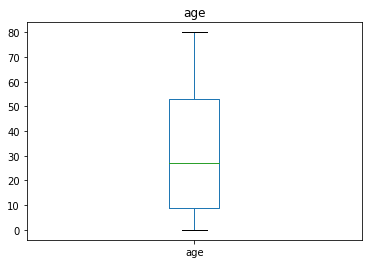

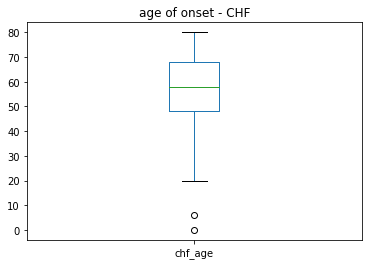

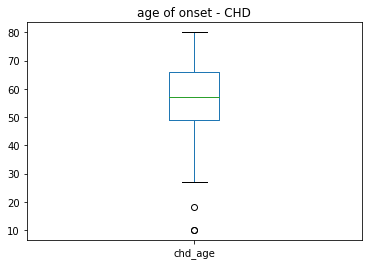

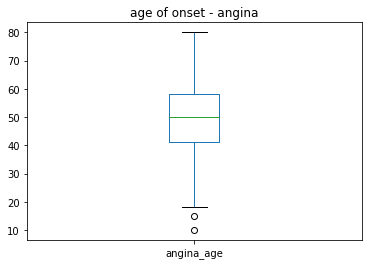

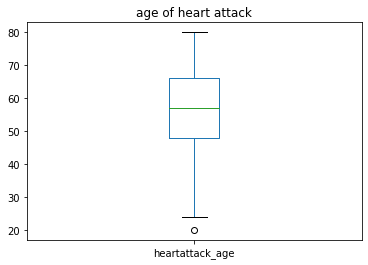

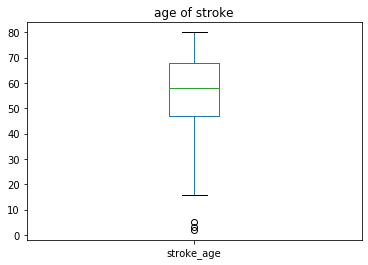

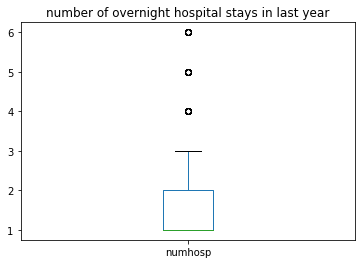

In [15]:
nhanes.age.plot(kind='box', title='age')
plt.show()
nhanes.chf_age.plot(kind='box', title='age of onset - CHF')
plt.show()
nhanes.chd_age.plot(kind='box', title='age of onset - CHD')
plt.show()
nhanes.angina_age.plot(kind='box', title='age of onset - angina')
plt.show()
nhanes.heartattack_age.plot(kind='box', title= 'age of heart attack')
plt.show()
nhanes.stroke_age.plot(kind='box', title= 'age of stroke')
plt.show()
nhanes.numhosp.plot(kind='box', title='number of overnight hospital stays in last year')
plt.show()



#### Now, we look at histograms for individual variables (ordinal categorical and quantitative), to further view the distribution of the data.

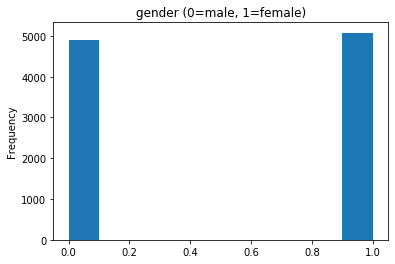

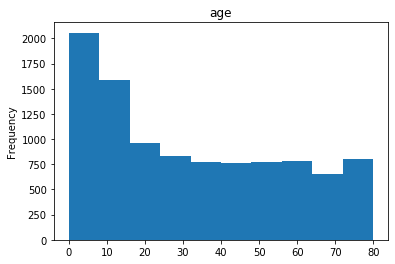

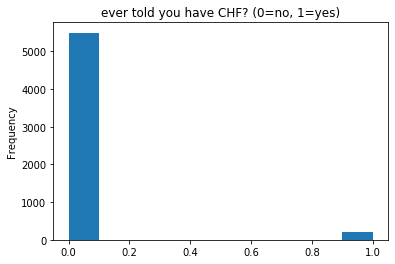

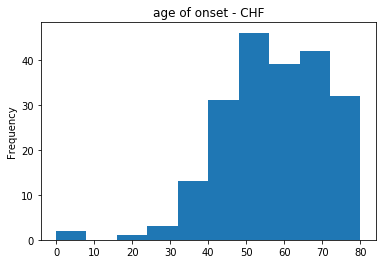

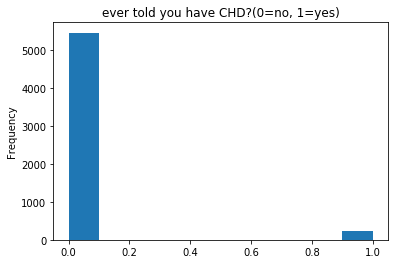

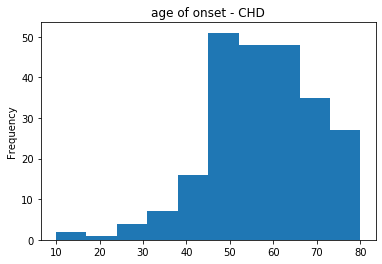

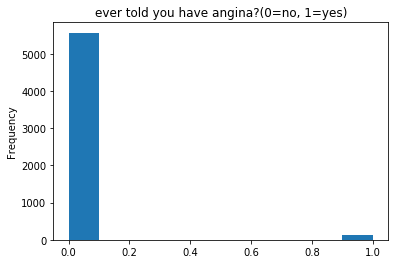

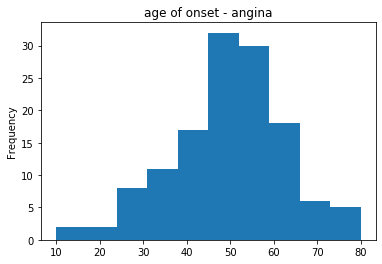

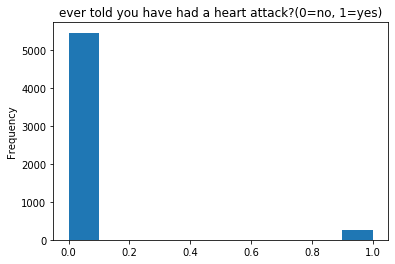

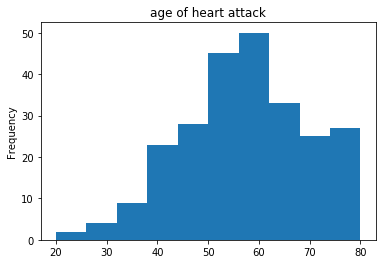

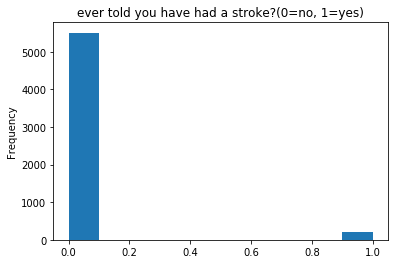

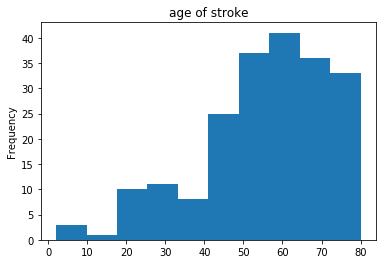

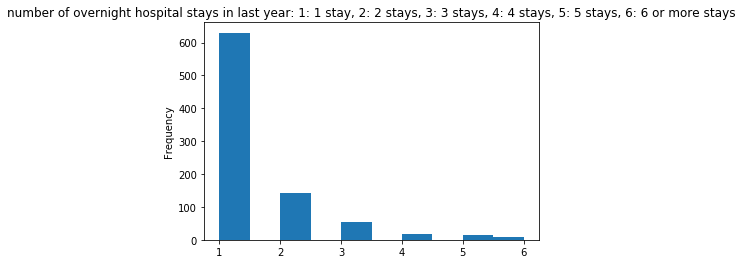

In [16]:
nhanes.gender.plot(kind='hist', title='gender (0=male, 1=female)')
plt.show()
nhanes.age.plot(kind='hist', title='age')
plt.show()
nhanes.chf.plot(kind='hist', title='ever told you have CHF? (0=no, 1=yes)')
plt.show()
nhanes.chf_age.plot(kind='hist', title='age of onset - CHF')
plt.show()
nhanes.chd.plot(kind='hist', title='ever told you have CHD?(0=no, 1=yes)')
plt.show()
nhanes.chd_age.plot(kind='hist', title='age of onset - CHD')
plt.show()
nhanes.angina.plot(kind='hist', title='ever told you have angina?(0=no, 1=yes)')
plt.show()
nhanes.angina_age.plot(kind='hist', title='age of onset - angina')
plt.show()
nhanes.heartattack.plot(kind='hist', title='ever told you have had a heart attack?(0=no, 1=yes)')
plt.show()
nhanes.heartattack_age.plot(kind='hist', title= 'age of heart attack')
plt.show()
nhanes.stroke.plot(kind='hist', title='ever told you have had a stroke?(0=no, 1=yes)')
plt.show()
nhanes.stroke_age.plot(kind='hist', title= 'age of stroke')
plt.show()
nhanes.numhosp.plot(kind='hist', title='number of overnight hospital stays in last year: 1: 1 stay, 2: 2 stays, 3: 3 stays, 4: 4 stays, 5: 5 stays, 6: 6 or more stays')
plt.show()


#### We now view the nominal categorical features for data distribution, using bar graphs.

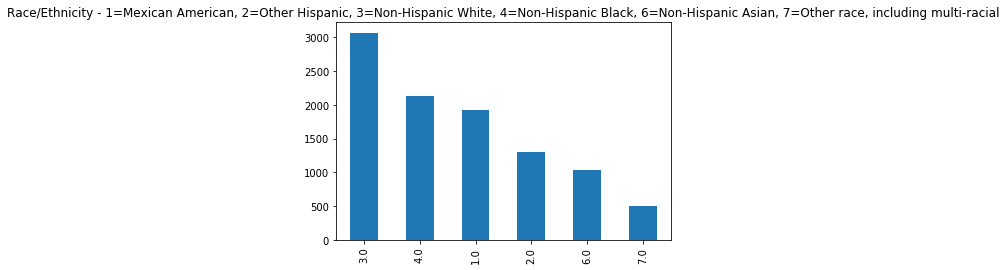

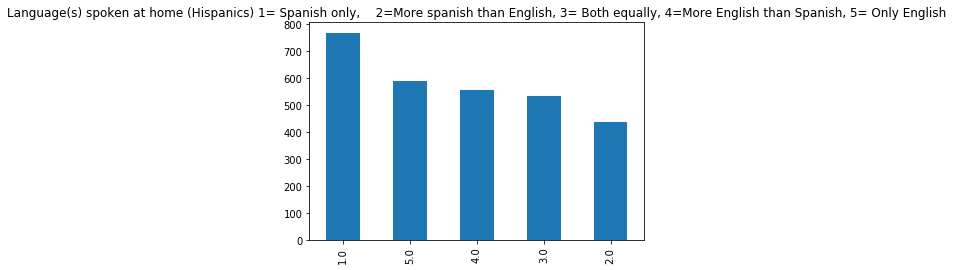

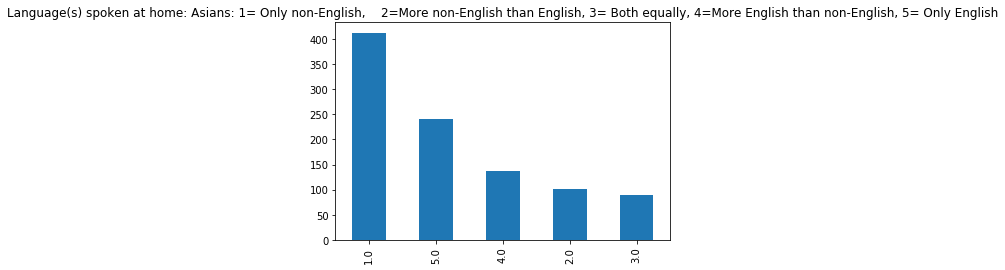

In [17]:
nhanes.ethnicity.value_counts().plot(kind='bar', title='Race/Ethnicity - 1=Mexican American, 2=Other Hispanic, 3=Non-Hispanic White, \
4=Non-Hispanic Black, 6=Non-Hispanic Asian, 7=Other race, including multi-racial')
plt.show()
nhanes.lang_hisp.value_counts().plot(kind='bar', title='Language(s) spoken at home (Hispanics) 1= Spanish only,\
    2=More spanish than English, 3= Both equally, 4=More English than Spanish, 5= Only English')
plt.show()
nhanes.lang_asian.value_counts().plot(kind='bar', title='Language(s) spoken at home: Asians: 1= Only non-English,\
    2=More non-English than English, 3= Both equally, 4=More English than non-English, 5= Only English')
plt.show()

#### Exploration of laboratory data (quantitative variables) using histograms.

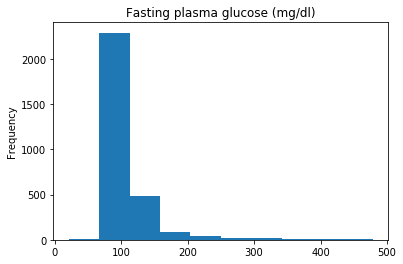

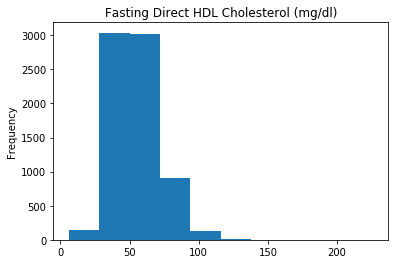

AttributeError: 'function' object has no attribute 'plot'

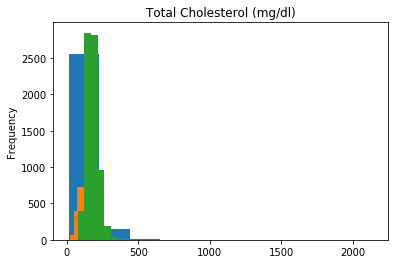

In [18]:
# Histograms of the laboratory data

nhanes.glucose.plot(kind='hist', title="Fasting plasma glucose (mg/dl)")
plt.show()
nhanes.hdl.plot(kind='hist', title='Fasting Direct HDL Cholesterol (mg/dl)')
plt.show()
nhanes.tg.plot(kind='hist', title='Fasting triglycerides (mg/dl)')
nhanes.ldl.plot(kind='hist', title='LDL Cholesterol (mg/dl)')
nhanes.tchol.plot(kind='hist', title='Total Cholesterol (mg/dl)')
nhanes.hgba1c.value_counts.plot(kind='hist', title='Glycated Hemoglobin (%)')


### We left all outliers in the dataset, because none of them were noticably incorrect.

### Last, we save the dataframe to a csv file.

In [ ]:
nhanes.to_csv('nhanes.csv')